How would you propose to generalize “z-scoring” (e.g., subtraction of the mean, normalization by the standard deviation) from the 1D case
to the multivariate case, where $x \in \mathbb{R}^D$? Generate a synthetic dataset with $10^4$
data points drawn from bivariate Gaussian distribution with different means and
standard deviations for both variables (e.g., $\bar{x}_1 = 10$, $\bar{x}_2 = 1$, and $\sigma_1 = 2$,
$\sigma_2 = 1$), and for three different correlation coefficients (e.g., $\rho = 0, 0.5, 0.95$).
Does your proposed transformation alter the covariance matrix?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [15]:
# For the 1D case:
x_1 = np.random.normal(size=10)
x_2 = np.random.normal(size=10)
x_3 = np.random.normal(size=10)
x_4 = np.random.normal(size=10)
x_5 = np.random.normal(size=10)

Z-scoring: for each data point, subtract the sample mean and divide by the standard deviation.

$$
z^{t} = \frac{x^{t} - \bar{x}}{\sigma_x}
$$

In [18]:
def z_score(data):
    xbar = np.mean(data)
    sigma = np.std(data)
    data_zscored = np.zeros(len(data))
    for element in range(len(data)):
        data_zscored[element] = (data[element] - xbar) / sigma
        
    return data_zscored
        
x1_zscored = z_score(x_1)
x2_zscored = z_score(x_2)
x3_zscored = z_score(x_3)
x4_zscored = z_score(x_4)
x5_zscored = z_score(x_5)

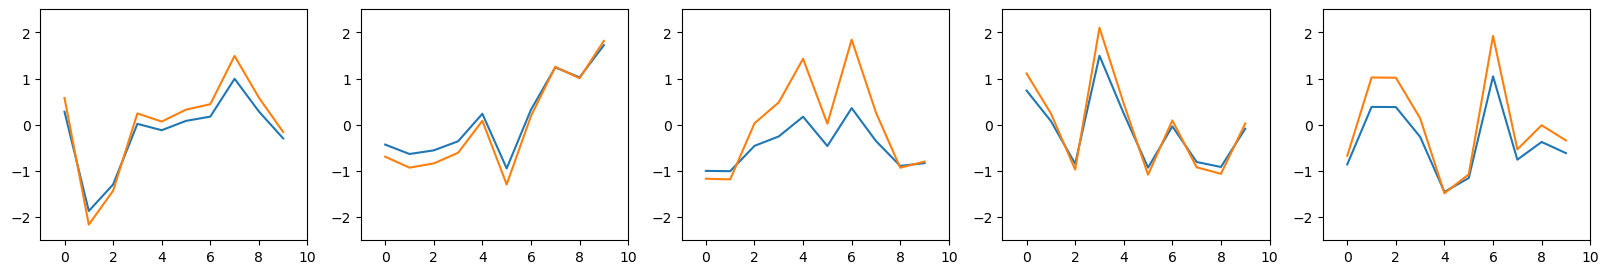

In [32]:
plt.figure(figsize=(20,3))

plt.subplot(151)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_1)
plt.plot(x1_zscored)

plt.subplot(152)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_2)
plt.plot(x2_zscored)

plt.subplot(153)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_3)
plt.plot(x3_zscored)

plt.subplot(154)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_4)
plt.plot(x4_zscored)

plt.subplot(155)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_5)
plt.plot(x5_zscored)